
Name : Pritam Channawar \
CRN: CS 627\
Project #3

# Dataset

Delhi Weather Data : This dataset contains weather data for New Delhi, India.(1996-2016) \
sourced from kaggle \


# Import libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#install package for prediction suggestions
!pip3 install arch yfinance pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Data

In [ ]:
data = pd.read_csv('/content/testset.csv')

# Overview to the data

In [ ]:
#data overview
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
#find number of rows and column
data.shape

(100990, 20)

In [ ]:
# describe dataframe numerical columns
data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [ ]:
#print the information of variables to check their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

# Chack for null values

Text(0, 0.5, 'Features')

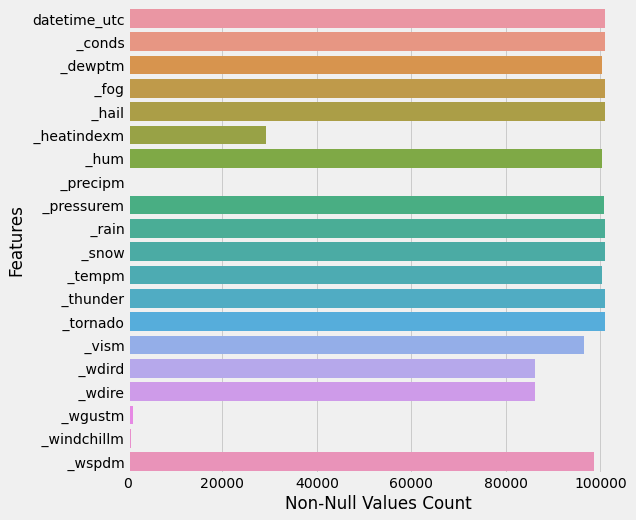

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=data.count()[:],y=data.count().index)
plt.xlabel('Non-Null Values Count')
plt.ylabel('Features')

In each column the number of missing values are:
datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64


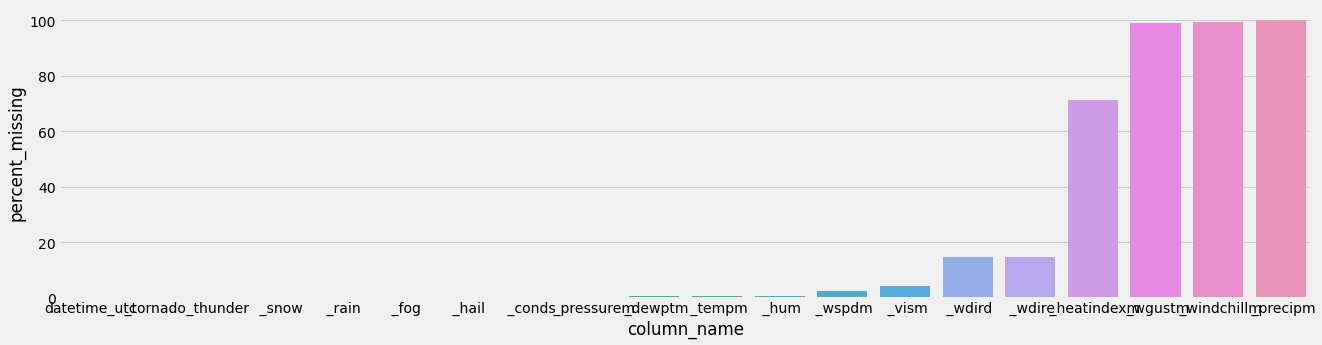

In [ ]:
#check for null value 
print('In each column the number of missing values are:')
print(data.isnull().sum())

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    x='column_name',
    y='percent_missing',
    #hue='Group',
    data=missing_value_df,
    ax=ax
)
plt.xlabel('column_name')
plt.ylabel('percent_missing')
plt.show()

Many of the features have a lot of missing values
We will remove those features which are having a lot of missing values (heatindexm, precipm, wgustm & windchillm) & we will try to fill missing values in the rest of the features
We can see there are some missing values in temp also.

In [ ]:
#drop columns with null values
data = data.drop([' _heatindexm',' _precipm',' _wgustm',' _windchillm'],axis=1)

# Pre-processing and EDA

In [ ]:
data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _hum           float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wspdm         float64
dtype: object

It shows 'index' as object type which needs to be converted to datetime otherwise we won't be able to perform scaling during time series analysis.

In [ ]:
from datetime import datetime
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
data['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [ ]:
data = data.set_index('datetime_utc',drop=True)
data.index.name = 'datetime'

Text(0, 0.5, 'Percent')

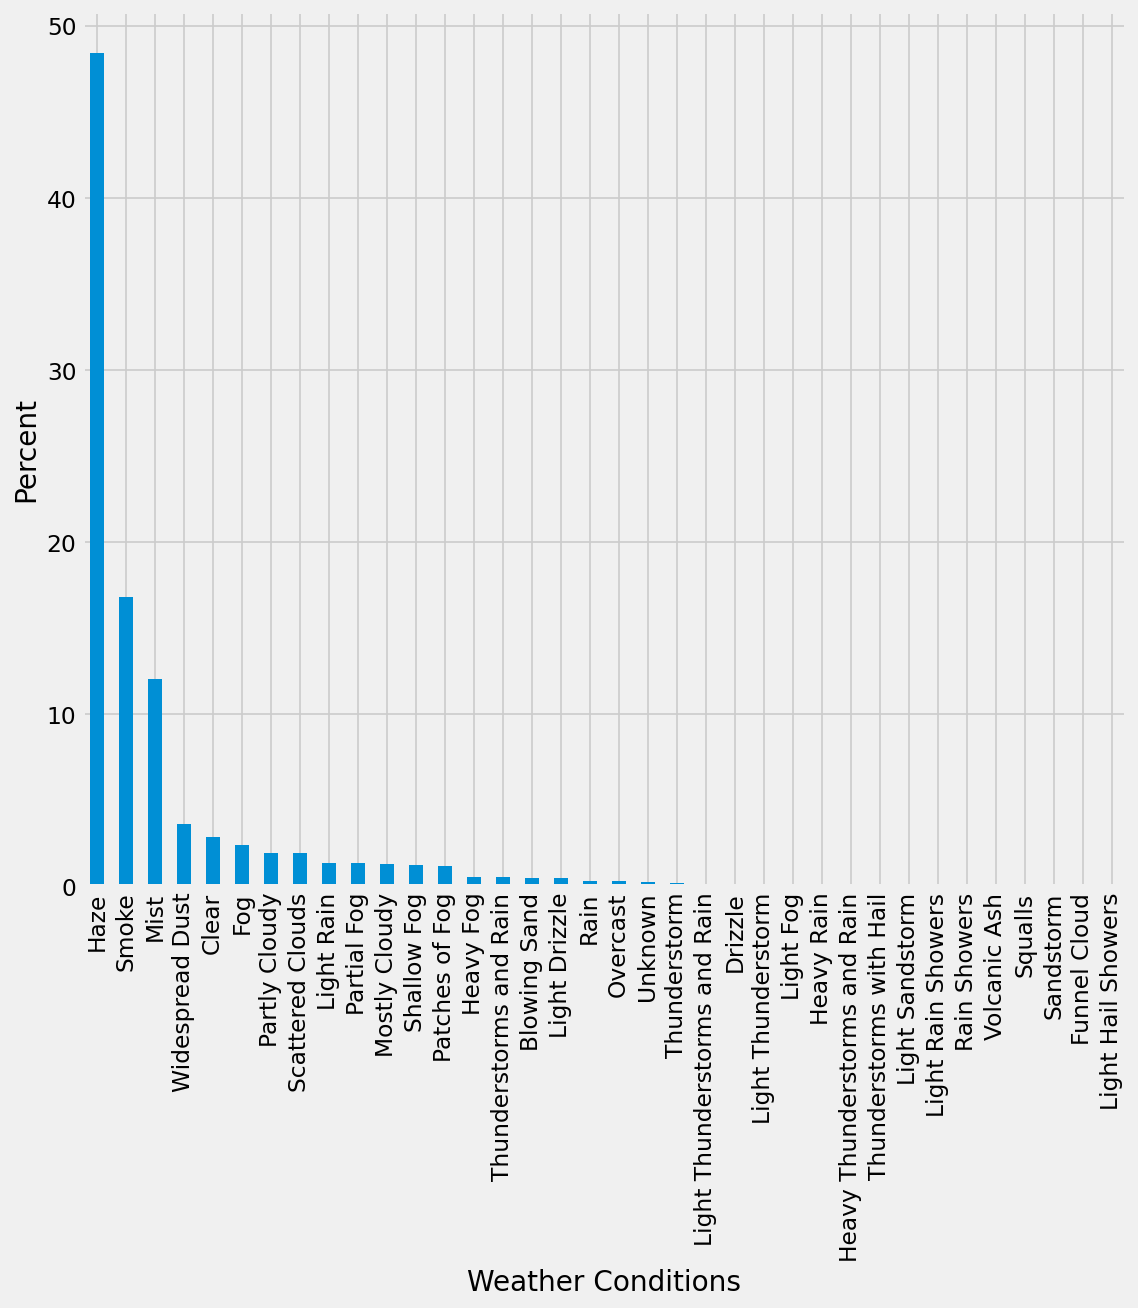

In [ ]:
#Let's checkout the most common weather condition type in Delhi.
weather_condition = (data[' _conds'].value_counts()/(data[' _conds'].value_counts().sum()))*100
weather_condition.plot.bar(figsize=(10,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

Oh, it is really bad that mostly Delhi has Hazy and smoky weather conditions, it shows the level of pollution city has.

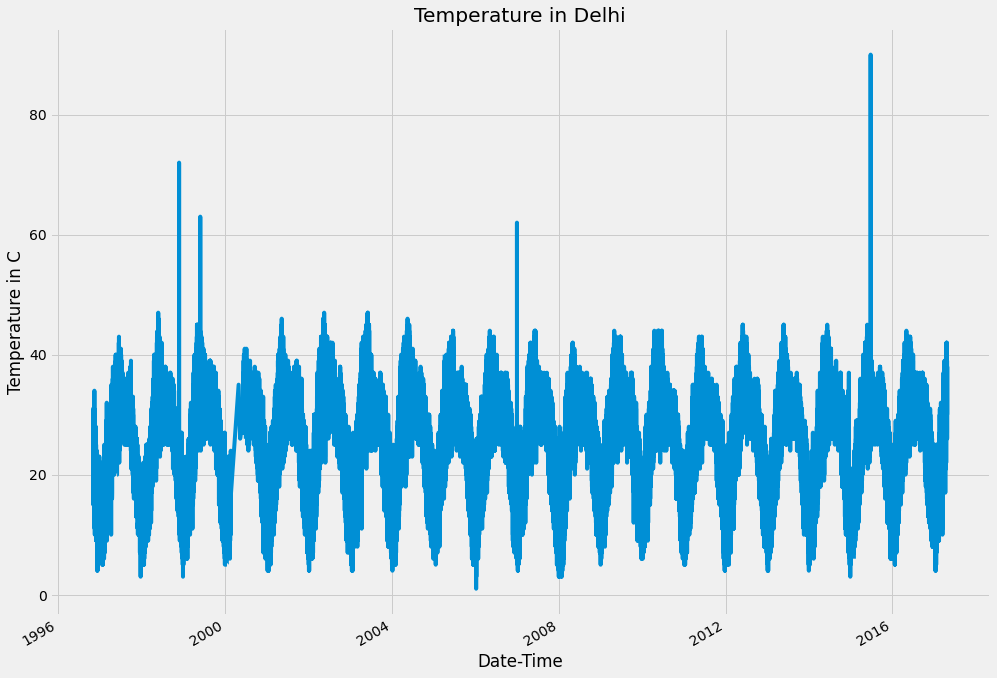

In [ ]:
fig, ax = plt.subplots()
data[' _tempm'].plot(figsize=(15,12),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi')
plt.show()

We can a seasonal pattern in the timeseries
It is also not continuous as it is having some missing data (between 2000 and 2001)
This could be a problem while modeling the timeseries. So, to avoid this we will train our model on the data from the year-2001 as we have enough data for training and there is no significant trend that we will miss by dropping the data before 2001
We have some OUTLIERS in the series also as we can see some really high temperature values. We will remove these outliers.
We have large amount of data but we will only use the necessary data (2013-2016)

# Data cleaning

In [ ]:
# Dropping the data before 2001
data = data['2001':]

In [ ]:
# We will remove the missing data and later we will interpolate the temperature for that missing data
print("Before : ", data.shape)
data.dropna(subset=[' _tempm'],inplace=True)
print("After :", data.shape)

Before :  (77929, 15)
After : (77474, 15)


In [ ]:
data.index.minute.value_counts()

0     46991
30    30276
21      143
51       29
50       15
25        3
40        3
38        3
20        2
2         1
45        1
22        1
53        1
52        1
3         1
15        1
34        1
32        1
Name: datetime, dtype: int64

Here we can see we have irregular time-intervals
So we will remove the minute time-stamp and will only consider the hourly data

In [ ]:
categoricalColumns = list(set(data.columns) - set(data._get_numeric_data().columns))
categoricalColumns

[' _wdire', ' _conds']

In [ ]:
# We are resampling it by hours & filling the missing values using the interpolation method
# Notice here we will only get numeric columns so we will have to add the categorical columns additionaly
newdata = data.resample('H').mean().interpolate()
newdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142987 entries, 2001-01-01 00:00:00 to 2017-04-24 18:00:00
Freq: H
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0    _dewptm     142987 non-null  float64
 1    _fog        142987 non-null  float64
 2    _hail       142987 non-null  float64
 3    _hum        142987 non-null  float64
 4    _pressurem  142987 non-null  float64
 5    _rain       142987 non-null  float64
 6    _snow       142987 non-null  float64
 7    _tempm      142987 non-null  float64
 8    _thunder    142987 non-null  float64
 9    _tornado    142987 non-null  float64
 10   _vism       142987 non-null  float64
 11   _wdird      142987 non-null  float64
 12   _wspdm      142987 non-null  float64
dtypes: float64(13)
memory usage: 15.3 MB


In [ ]:
#check for null value 
print('In each column the number of missing values are:')
print(newdata.isnull().sum())

percent_missing = newdata.isnull().sum() * 100 / len(newdata)
missing_value_df = pd.DataFrame({'column_name': newdata.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In each column the number of missing values are:
 _dewptm       0
 _fog          0
 _hail         0
 _hum          0
 _pressurem    0
 _rain         0
 _snow         0
 _tempm        0
 _thunder      0
 _tornado      0
 _vism         0
 _wdird        0
 _wspdm        0
dtype: int64


In [ ]:
# To resample the categorical data we will consider the firt observation and to fill the missing values we will use ffill method
newdata[list(categoricalColumns)] = data[categoricalColumns].resample('H').first().ffill().head()
newdata.head()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,_wdire,_conds
datetime,,,,,,,,,,,,,,,
2001-01-01 00:00:00,13.0,0.0,0.0,94.0,1011.0,0.0,0.0,14.0,0.0,0.0,1.4,90.0,9.3,East,Scattered Clouds
2001-01-01 01:00:00,12.0,0.0,0.0,94.0,1011.0,0.0,0.0,13.0,0.0,0.0,1.3,70.0,11.1,ENE,Scattered Clouds
2001-01-01 02:00:00,12.0,0.0,0.0,94.0,1012.0,0.0,0.0,13.0,0.0,0.0,1.3,50.0,13.0,NE,Mostly Cloudy
2001-01-01 03:00:00,13.0,0.0,0.0,100.0,1013.0,1.0,0.0,13.0,1.0,0.0,1.0,140.0,5.6,SE,Light Thunderstorms and Rain
2001-01-01 04:00:00,12.0,0.0,0.0,94.0,1014.0,1.0,0.0,13.0,1.0,0.0,1.0,110.0,7.4,ESE,Light Thunderstorms and Rain


              _dewptm      _fog     _hail      _hum   _pressurem     _rain  \
 _dewptm     1.000000 -0.243261  0.006247  0.268638    -0.000959  0.172337   
 _fog       -0.243261  1.000000 -0.005549  0.362508     0.001457 -0.054379   
 _hail       0.006247 -0.005549  1.000000  0.011904     0.000679  0.000214   
 _hum        0.268638  0.362508  0.011904  1.000000     0.005430  0.193846   
 _pressurem -0.000959  0.001457  0.000679  0.005430     1.000000 -0.000138   
 _rain       0.172337 -0.054379  0.000214  0.193846    -0.000138  1.000000   
 _snow       0.006245 -0.001559 -0.000106  0.004664     0.000147 -0.001105   
 _tempm      0.566637 -0.446497 -0.002598 -0.591843    -0.013438  0.006907   
 _thunder    0.079994 -0.033155  0.140089  0.071636    -0.006049  0.411882   
 _tornado   -0.001134 -0.001559 -0.000106  0.004168     0.000270 -0.001105   
 _vism       0.021482 -0.050190 -0.000820 -0.052210    -0.001919 -0.005833   
 _wdird     -0.267780 -0.025620  0.000020 -0.224499     0.022450

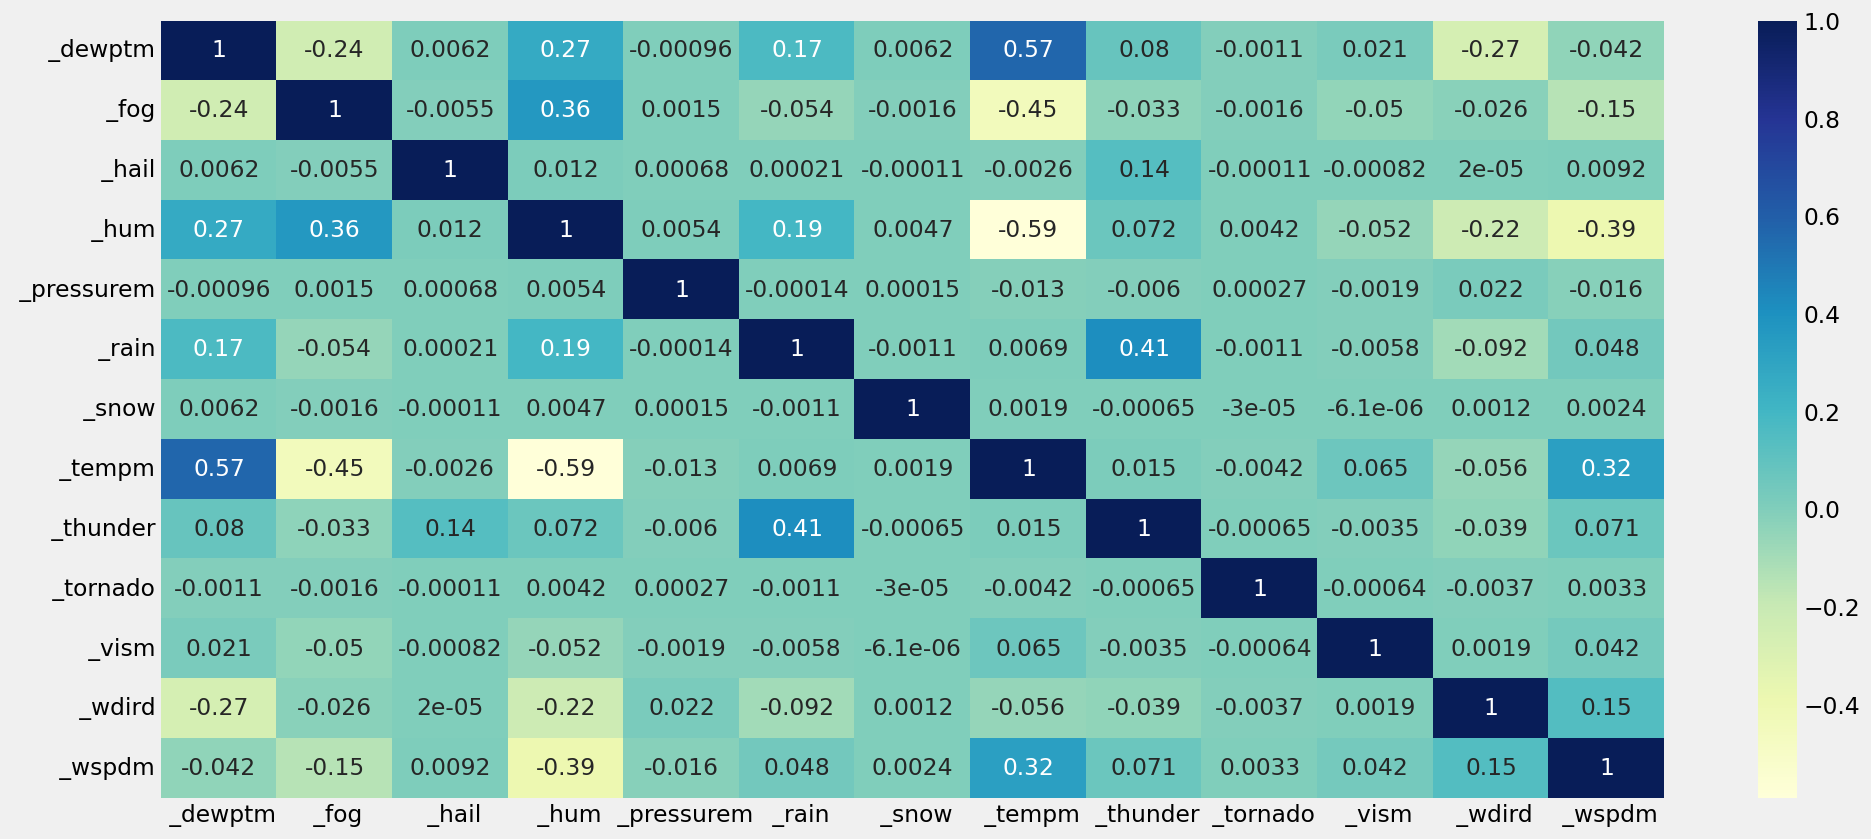

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
print(newdata.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(newdata.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

We are going to forecast model against temperature feature as it is highly correlated.

#Data modeling

In [ ]:
def plotAggregateValues(data,column=None):
  if column in data.columns:
    plt.figure(figsize = (18,25))
    
    ax1 = plt.subplot(4,2,1)
    newdata[column].groupby(newdata.index.year).mean().plot(ax=ax1,title='yearly mean values')
    ax1.set_xlabel('years')
    ax1.set_ylabel(column)
  
    ax2 = plt.subplot(4,2,2)
    newdata[column].groupby(newdata.index.month).mean().plot(ax=ax2,title='monthly mean values')
    ax2.set_xlabel('months')
    ax2.set_ylabel(column)

    ax4 = plt.subplot(4,2,4)
    newdata[column].groupby(newdata.index.hour).mean().plot(ax=ax4,title='hourly mean values')
    ax4.set_xlabel('hours')
    ax4.set_ylabel(column)
  else:
    print("Column name not specified or Column not in the data")

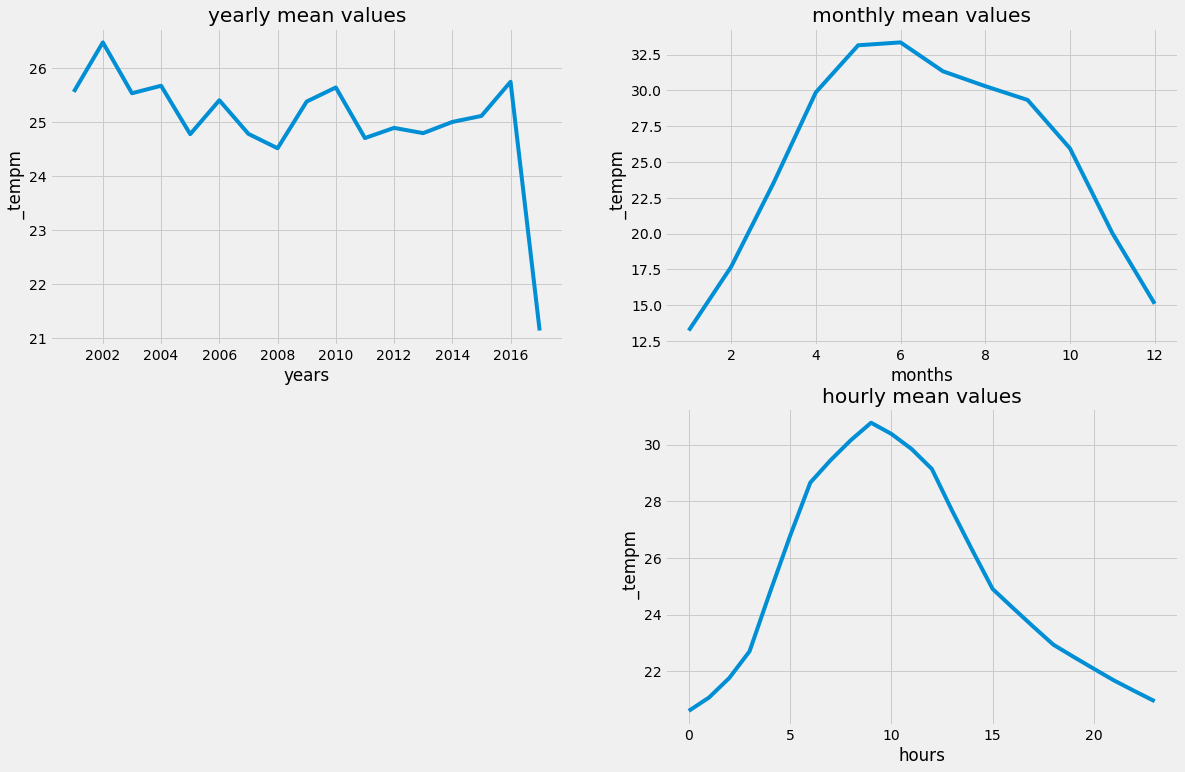

In [ ]:
# aggregation plot for temperature
plotAggregateValues(newdata,' _tempm')

We can see highest temperature during 5th & 6th month as it is summer time and low temperature during the end and start of the year because of winter.
Also, there is high temperature during 11-13 hours as it is noon time and low temperature during night hours.

In [ ]:
def plotBoxNdendity(data,col=None):
  if col in data.columns:    
    plt.figure(figsize=(18,8))

    ax1 = plt.subplot(121)
    data.boxplot(col,ax=ax1)
    ax1.set_ylabel('Boxplot temperature levels in Delhi', fontsize=10)

    ax2 = plt.subplot(122)
    data[col].plot(ax=ax2,legend=True,kind='density')
    ax2.set_ylabel('Temperature distribution in Delhi', fontsize=10)

  else:
    print("Column not in the data")

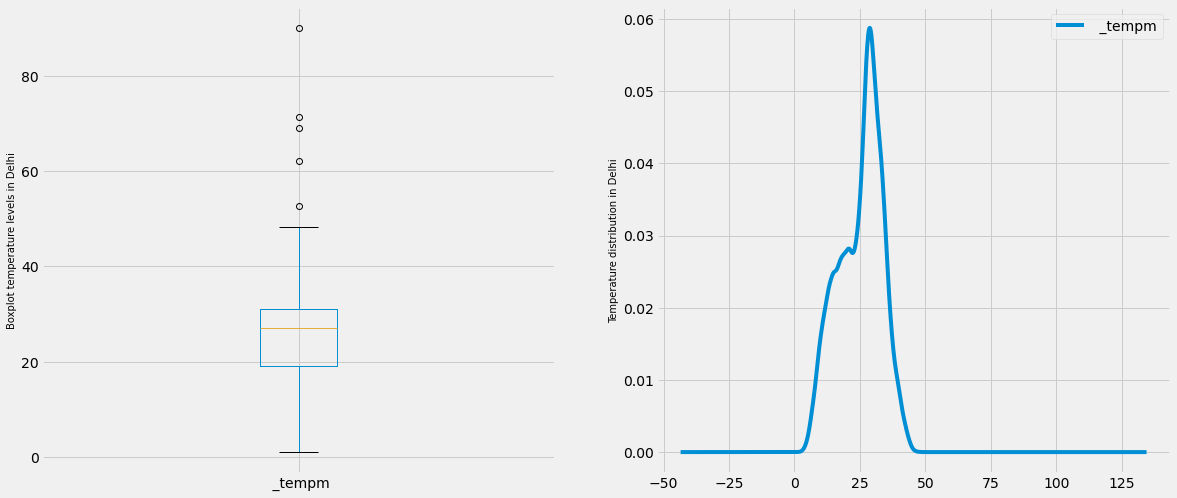

In [ ]:
plotBoxNdendity(newdata,' _tempm')

We can observe outliers in box plot which are extremely high.
50% of the temperature values are distributed around ~26 C

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f021beaf6d0>],
      dtype=object)

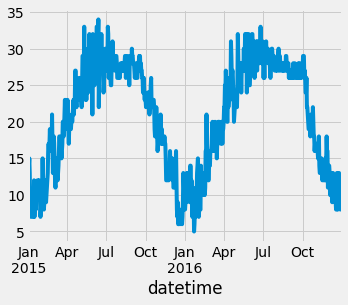

In [ ]:
tempdata = newdata[' _tempm']
tempdata['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(5,4))

So it shows that mid two quarter are hotter than first and last.

# Test and train split

In [ ]:
train = newdata[:'2015']
test = newdata['2016':]

# Decomposition 

In [ ]:
#import statsmodels.api as sm
# Let's decompose the time series to visualize trend, season and noise seperately
def decomposeNplot(data):
  decomposition = seasonal_decompose(data)

  plt.figure(figsize=(15,16))

  ax1 = plt.subplot(411)
  decomposition.observed.plot(ax=ax1)
  ax1.set_ylabel('Observed')

  ax2 = plt.subplot(412)
  decomposition.trend.plot(ax=ax2)
  ax2.set_ylabel('Trend')

  ax3 = plt.subplot(413)
  decomposition.seasonal.plot(ax=ax3)
  ax3.set_ylabel('Seasonal')

  ax4 = plt.subplot(414)
  decomposition.resid.plot(ax=ax4)
  ax4.set_ylabel('Residuals')

  return decomposition

In [ ]:
# Resampling the data to mothly and averaging out the temperature & we will predict the monthly average temperature
ftraindata = train[' _tempm'].resample('M').mean()
ftestdata = test[' _tempm'].resample('M').mean()

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term. The seasonal_decompose in statsmodels implements this conveniently.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ftraindata, model='multiplicative', period=12)

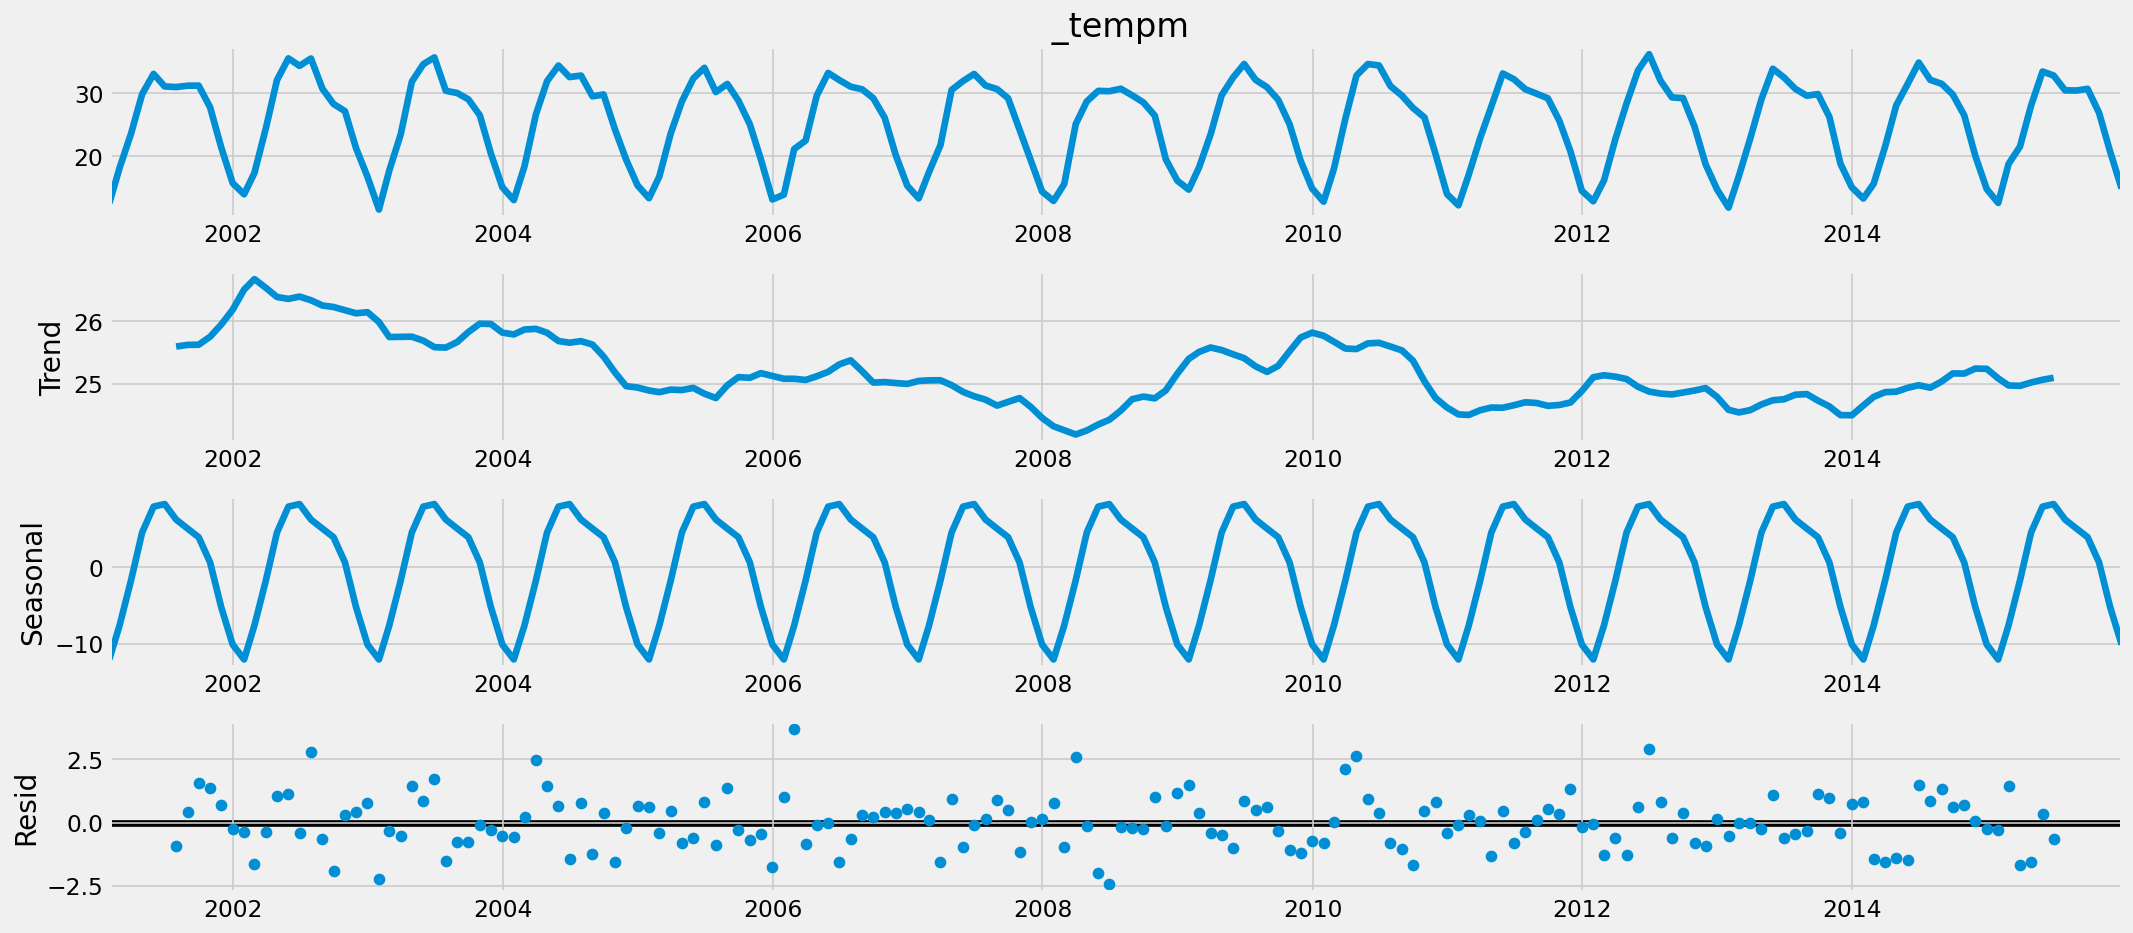

<Figure size 4000x1600 with 0 Axes>

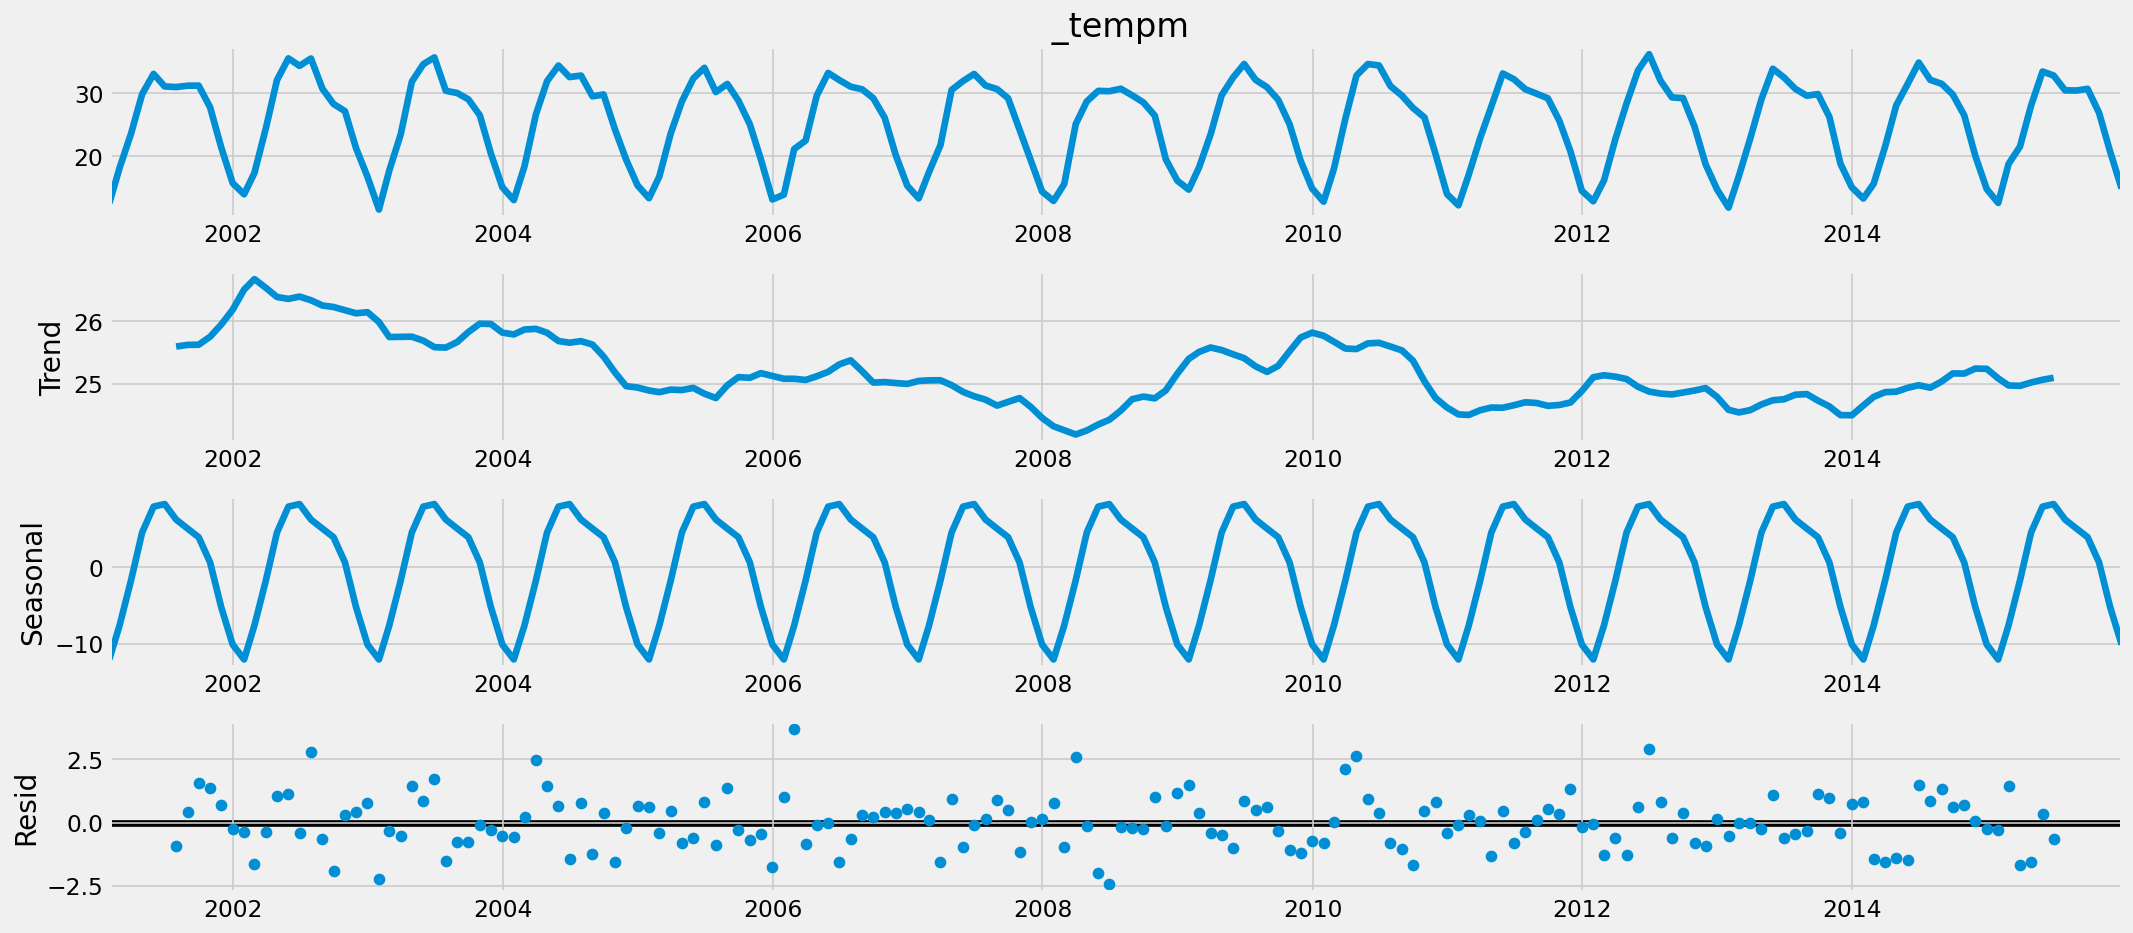

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
result.plot()

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

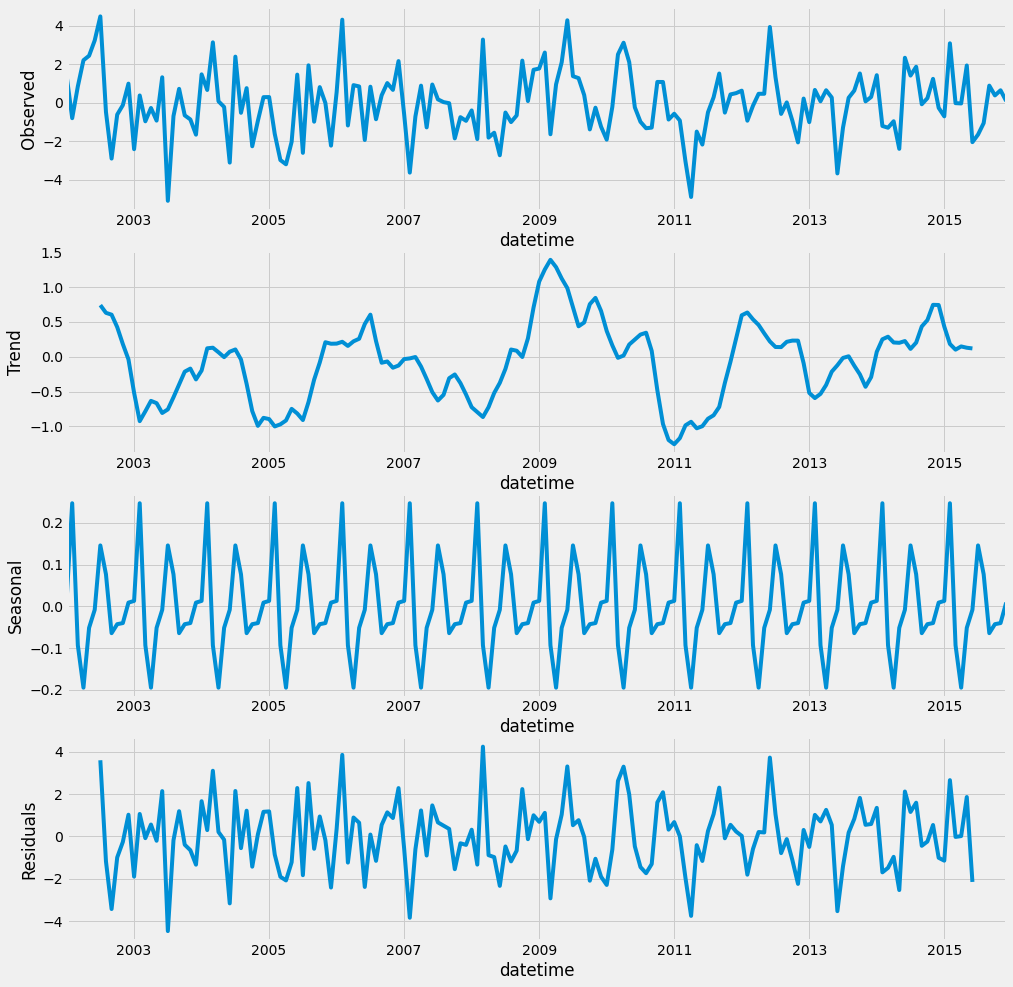

In [ ]:
# Taking the seasonal difference S=12 and decomposing the timeseries
decomposition = decomposeNplot(ftraindata.diff(12).dropna())

In [ ]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [ ]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

In Dickey-Fuller test, we need only test_statics and critical_value to know if it is stationary or not

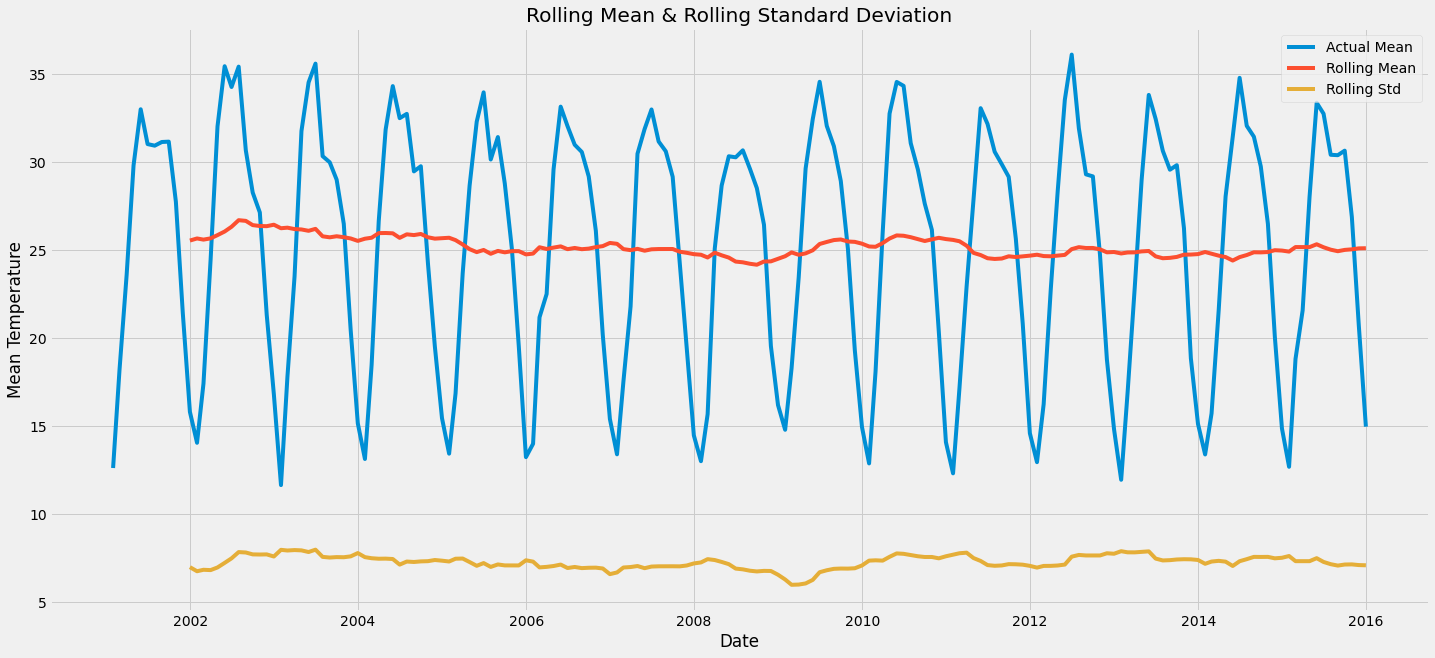

Test statistic:  -2.286122106214242
Critical Values: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}


In [ ]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(ftraindata)
perform_dickey_fuller_test(ftraindata)

We have constant Mean and Variance, and our Test statistic is less than Critical Values, so we already have stationary Time series. So our 'd' value will become 0 in ARIMA Model.

Consider a case if it was non-stationary, in that case we would use below techniques to make it stationary

Make Stationary For non-stationary to stationary conversion, we can use any of the below technique :

Decomposing
Differencing
Here, we are preferring Differencing because it is very straight forward. We would use below co-relation plots to identify the order of differencing

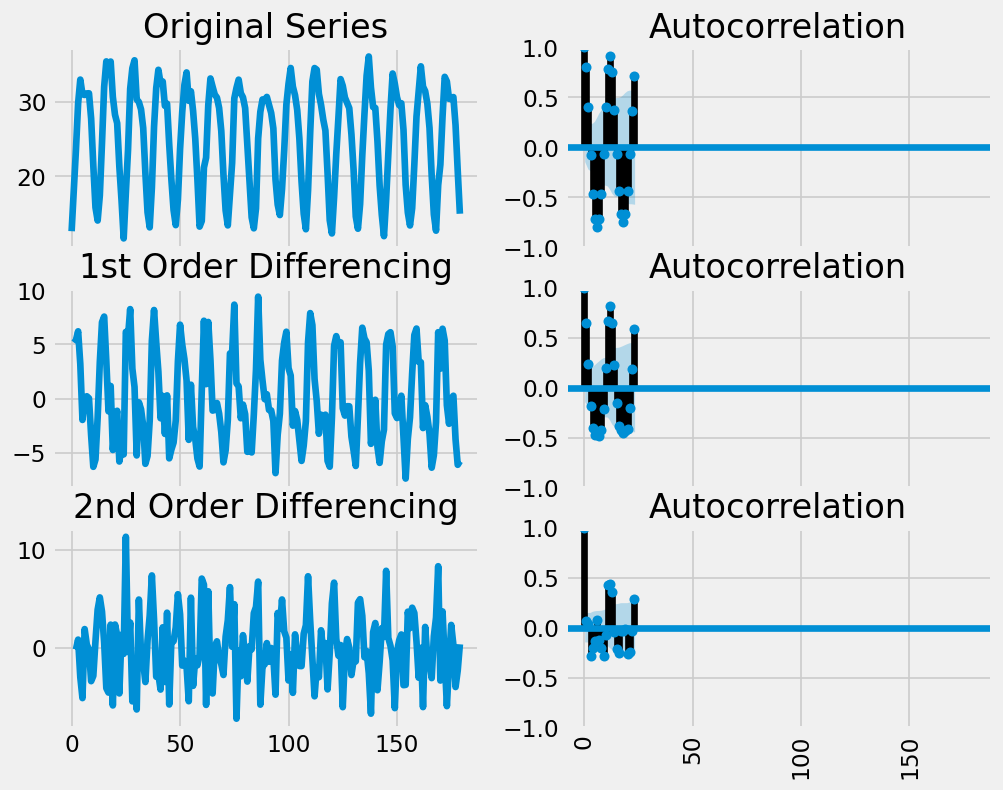

In [ ]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(ftraindata.values); 
axes[0, 0].set_title('Original Series')
plot_acf(ftraindata.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(ftraindata.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(ftraindata.diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(ftraindata.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ftraindata.diff().diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Let's check for stationarity (Augmented Dickey Fuller test)
results = adfuller(ftraindata.diff(12).dropna())
results

(-6.343758315810132,
 2.7145086550473428e-08,
 11,
 156,
 {'1%': -3.4729792729247793,
  '5%': -2.8802520918255534,
  '10%': -2.5767469641683105},
 530.2085130736691)

p-value is less than 0.05 and test-statistic is also less very -ev
So we can say the series is stationary and we can model it without any further transforms

We observed before that there is a yearly periodic pattern- Seasonal

# PACF and ACF

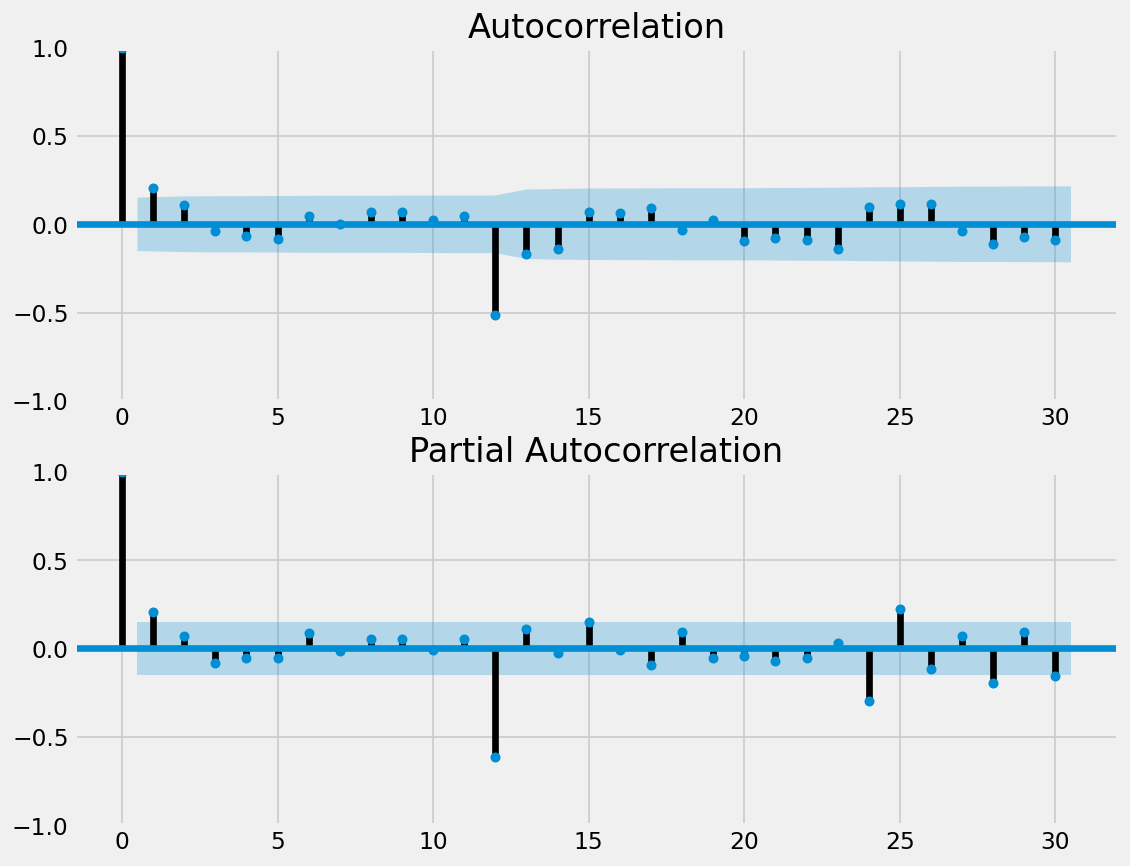

In [ ]:
# To get non-seasonal oreders of the SARIMAX Model we will first use ACF & PACF plots
plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(ftraindata.diff(12).dropna(),lags=30,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(ftraindata.diff(12).dropna(),lags=30,ax=ax2)

It's hard to get the idea of the non-seasonal orders from these plots

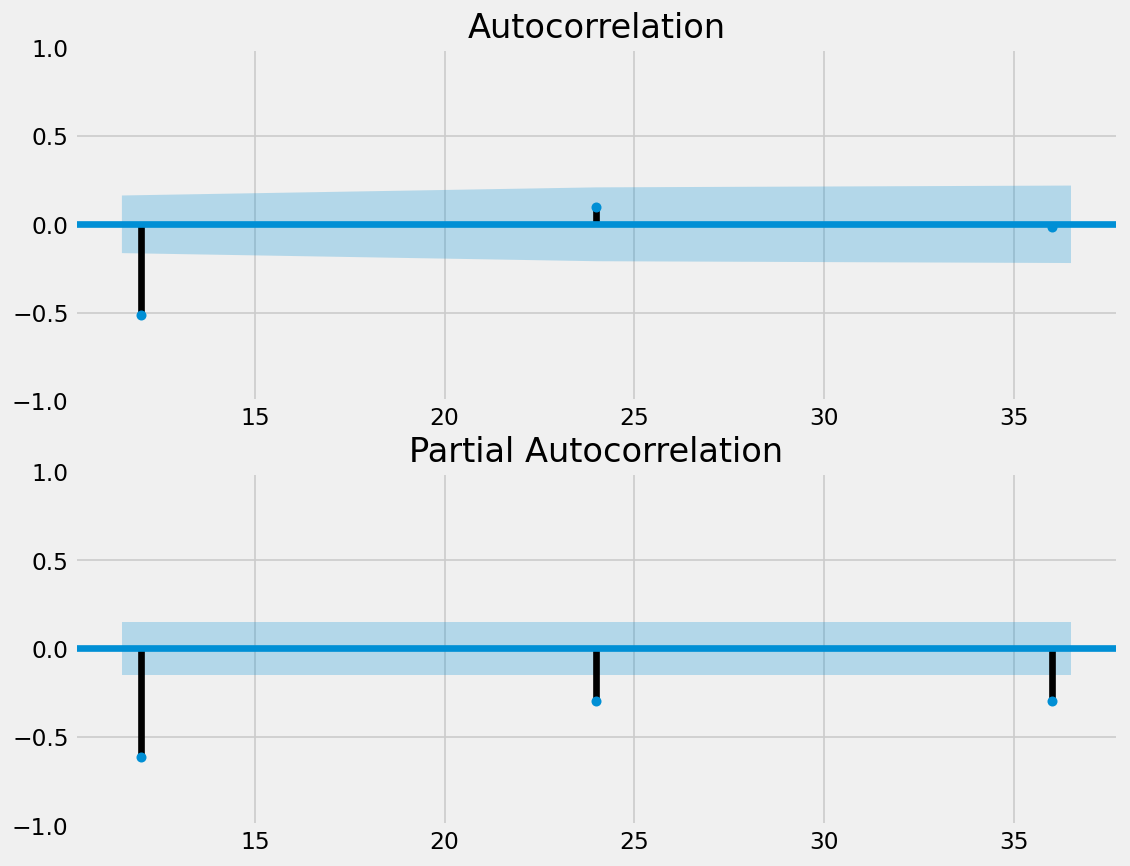

In [ ]:
# To get seasonal oreders of the SARIMAX Model we will first use ACF & PACF plots at seasonal lags 

lags = [12*i for i in range(1,4)]

plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(ftraindata.diff(12).dropna(),lags=lags,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(ftraindata.diff(12).dropna(),lags=lags,ax=ax2)

Interpreting ACF plots \
ACF Shape	Indicated Model	\
Exponential :decaying to zero	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model	 \
Alternating positive and negative, decaying to zero Autoregressive model.:	Use the partial autocorrelation plot to help identify the order.	\
One or more spikes, rest are essentially zero: Moving average model, order identified by where plot becomes zero.	\
Decay, starting after a few lags :	Mixed autoregressive and moving average (ARMA) model.	\
All zero or close to zero	: Data are essentially random.	\
High values at fixed intervals :	Include seasonal autoregressive term.	\
No decay to zero:	Series is not stationary	


As ACF cuts off after lag 1 & PACF is trailing off we can say that the order of seasonal MA is 1 (Q=1)


# ARIMA model

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points). Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ftraindata, nlags=20)
lag_pacf = pacf(ftraindata, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

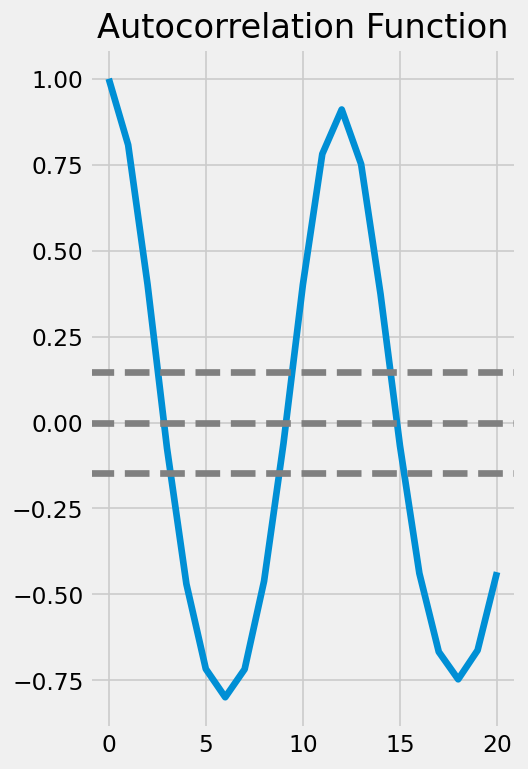

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ftraindata)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ftraindata)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

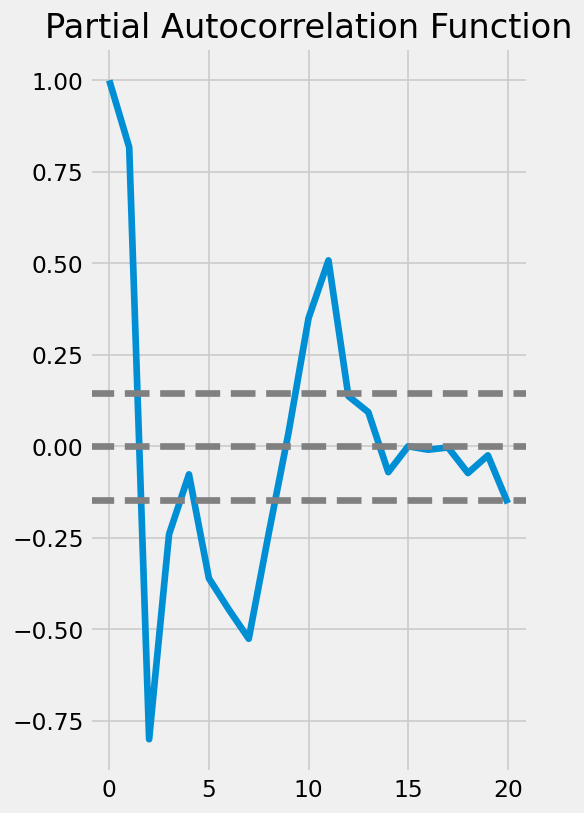

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ftraindata)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ftraindata)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

These grey dotted line are confidence intervels which we are going to use to find out the value of p and q.

p - the point where PACF crosses the upper confiednce level. In our case it seems to be 2. So we will take p = 2.

q - the point where ACF crosses the upper confiednce level. In our case it seems to be 2. So we will take q = 2.

d - number of nonseasonal differences needed for stationarity. In this case we are going to take it as 0, since this series is already stationary.

Now we are going fit time series for ARIMA Models. We will compare performance on the basis of RSS score and at last prefer the best one.

Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

Partial Autocorrelation Function (PACF): is used to measure the degree of association between X(t) and X(t-p).

In [ ]:
# extracting only the temperature values
values = pd.DataFrame(ftraindata)
 
# using shift function to shift the values.
dataframe = pd.concat([values.shift(3), values.shift(2),
                       values.shift(1), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+1', 't+2', 't+3']
 
# using corr() function to compute the correlation
result = dataframe.corr()
 
print(result)

            t       t+1       t+2       t+3
t    1.000000  0.822367  0.413493 -0.075944
t+1  0.822367  1.000000  0.820373  0.408898
t+2  0.413493  0.820373  1.000000  0.819712
t+3 -0.075944  0.408898  0.819712  1.000000


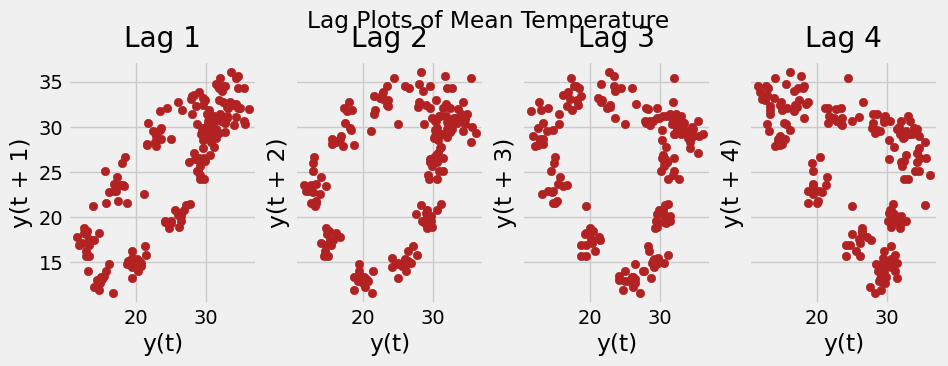

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ftraindata, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Mean Temperature', y=1.05)    
plt.show()

Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

Partial Autocorrelation Function (PACF): is used to measure the degree of association between X(t) and X(t-p).

# ARIMA Model

In [ ]:
#apply randon model with estimated p, q and d value
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ftraindata, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 _tempm   No. Observations:                  180
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -389.504
Date:                Thu, 15 Dec 2022   AIC                            791.007
Time:                        15:11:33   BIC                            810.165
Sample:                    01-31-2001   HQIC                           798.775
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1669      0.126    199.650      0.000      24.920      25.414
ar.L1          1.6700      0.025     67.060      0.000       1.621       1.719
ar.L2         -0.9432      0.026    -36.319      0.0

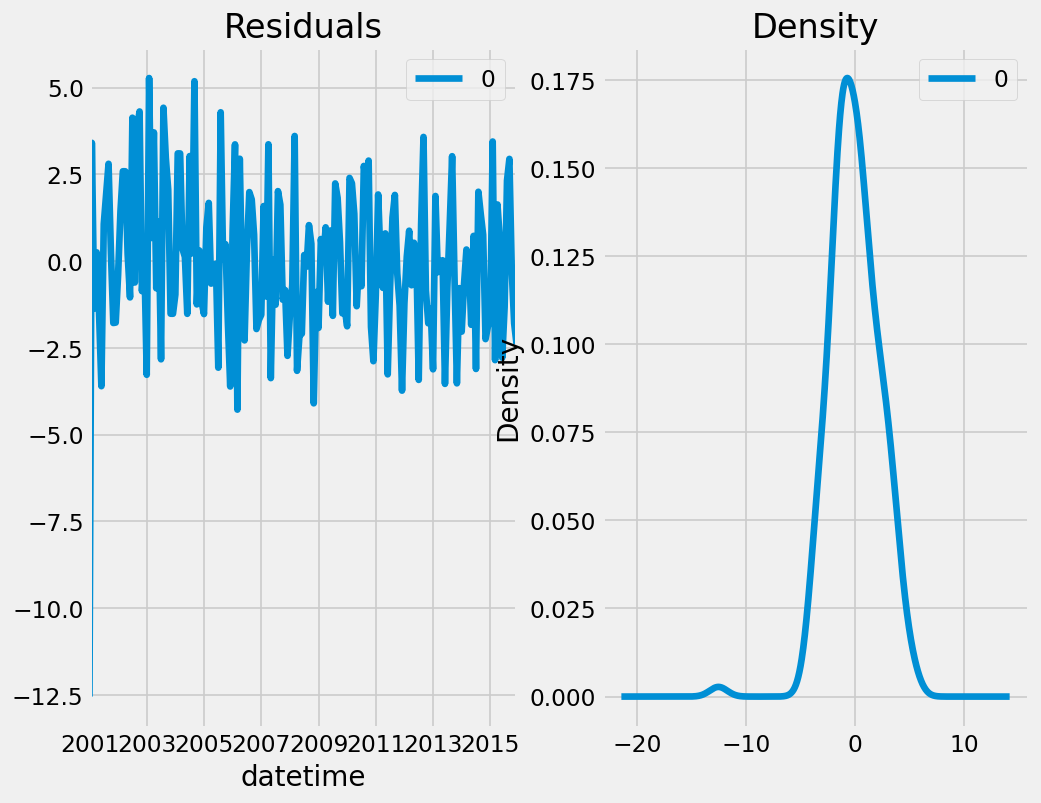

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

In [ ]:
# Mean Absolute Error for training data
print(np.mean(np.abs(model_fit.resid)))

1.7582805162953574


In [ ]:
#calculate RSE and RMSE values
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

start=len(ftraindata)
end=len(ftraindata)+len(ftestdata)-1
predictions = model_fit.predict(start=start, end=end).rename('	SARIMAX(4, 0, 2)'	)
rmse_SARIMA = rmse(ftestdata, predictions)
print('Root Mean Squared Error ',rmse_SARIMA)

mse_SARIMA = mean_squared_error(ftestdata, predictions)
print('Mean Squared Error ',mse_SARIMA)

Root Mean Squared Error  2.425803731304775
Mean Squared Error  5.88452374281217


In [ ]:
#forecast
forecast = model_fit.get_forecast(steps=len(ftestdata))

In [ ]:
predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]

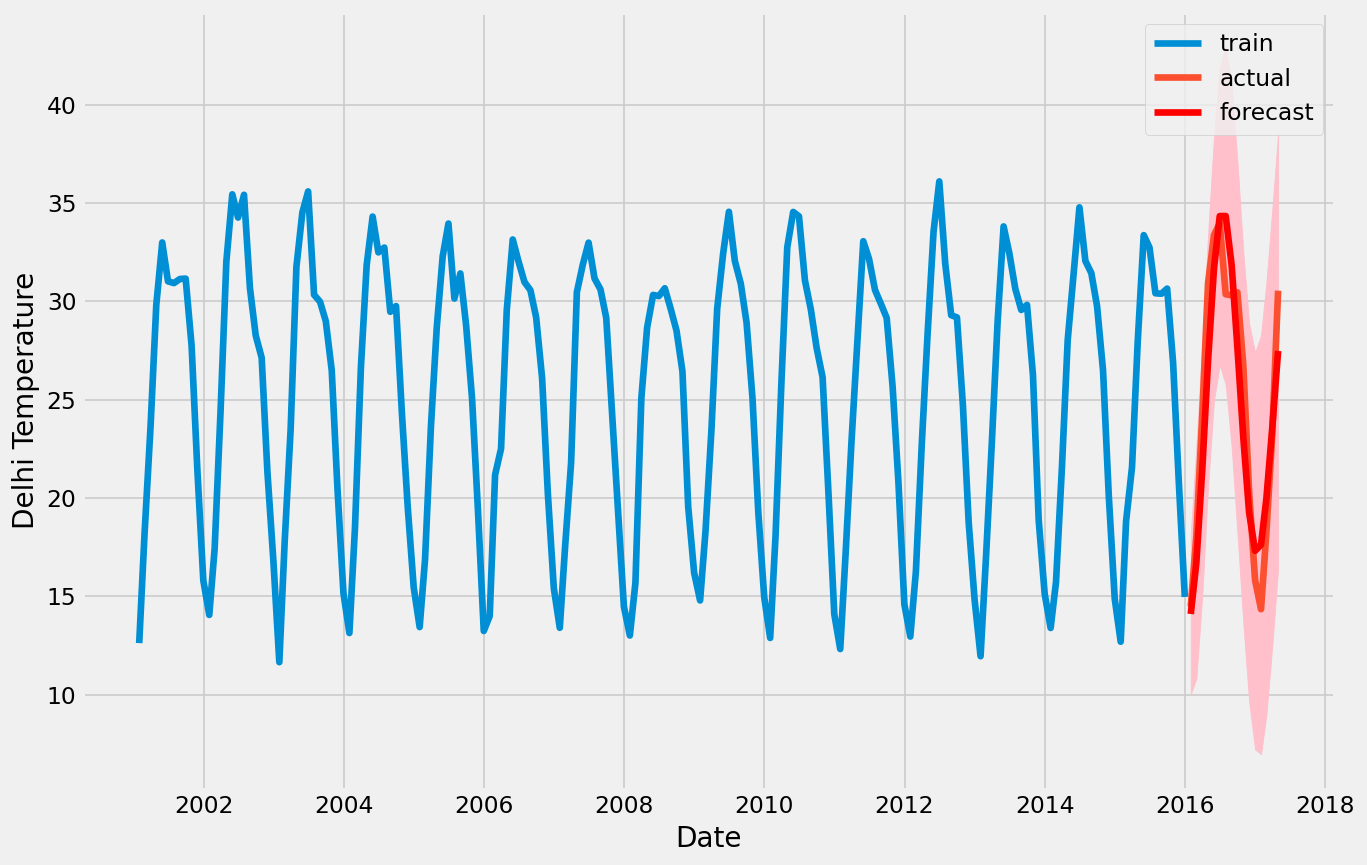

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(ftraindata.index, ftraindata, label='train')
plt.plot(ftestdata.index,ftestdata,label='actual')

plt.plot(predictedmean.index, predictedmean, color='r', label='forecast')

plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='pink')

plt.xlabel('Date')
plt.ylabel('Delhi Temperature')
plt.legend()
plt.show()

Looks Good. Next will explore auto ARIMA.

# Auto ARIMA

In [ ]:
#apply auto arima test without sesonality
from pmdarima.arima import auto_arima
auto_arima(ftraindata, seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -392.933
Date:                Thu, 15 Dec 2022   AIC                            799.867
Time:                        15:11:42   BIC                            822.218
Sample:                    01-31-2001   HQIC                           808.929
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.8855      0.085     34.095      0.000       2.720       3.051
ar.L2         -3.1794      0.228    -13.967      0.000      -3.626      -2.733
ar.L3          1.4810      0.227      6.527      0.000       1.036       1.926
ar.L4         -0.1871      0.084     -2.230      0.026      -0.352      -0.023
ma.L1         -1.8837      0.036    -51.917      0.000      -1.955      -1.813
ma.L2          0.9437      0.036     26.431      0.000       0.874       1.014
sigma2         4.3164      0.598      7.220      0.000       3.145       5.488
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 4.43
Prob(Q):                              0.46   Prob(JB):                         0.11
Heteroskedasticity (H):               0.70   Skew:                             0.03
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Lets apply model for prediction

In [ ]:
#fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ftraindata, order=(4,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 _tempm   No. Observations:                  180
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -392.933
Date:                Thu, 15 Dec 2022   AIC                            799.867
Time:                        15:11:42   BIC                            822.218
Sample:                    01-31-2001   HQIC                           808.929
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.8855      0.085     34.095      0.000       2.720       3.051
ar.L2         -3.1794      0.228    -13.967      0.000      -3.626      -2.733
ar.L3          1.4810      0.227      6.527      0.0

In [ ]:
#calculate RSE and RMSE values
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

start=len(ftraindata)
end=len(ftraindata)+len(ftestdata)-1
predictions = model_fit.predict(start=start, end=end).rename('	SARIMAX(4, 0, 2)'	)
rmse_SARIMA = rmse(ftestdata, predictions)
print('Root Mean Squared Error ',rmse_SARIMA)

mse_SARIMA = mean_squared_error(ftestdata, predictions)
print('Mean Squared Error ',mse_SARIMA)

Root Mean Squared Error  2.605019206369591
Mean Squared Error  6.7861250655544545


In [ ]:
# Mean Absolute Error for training data
print(np.mean(np.abs(model_fit.resid)))

1.8845699946478047


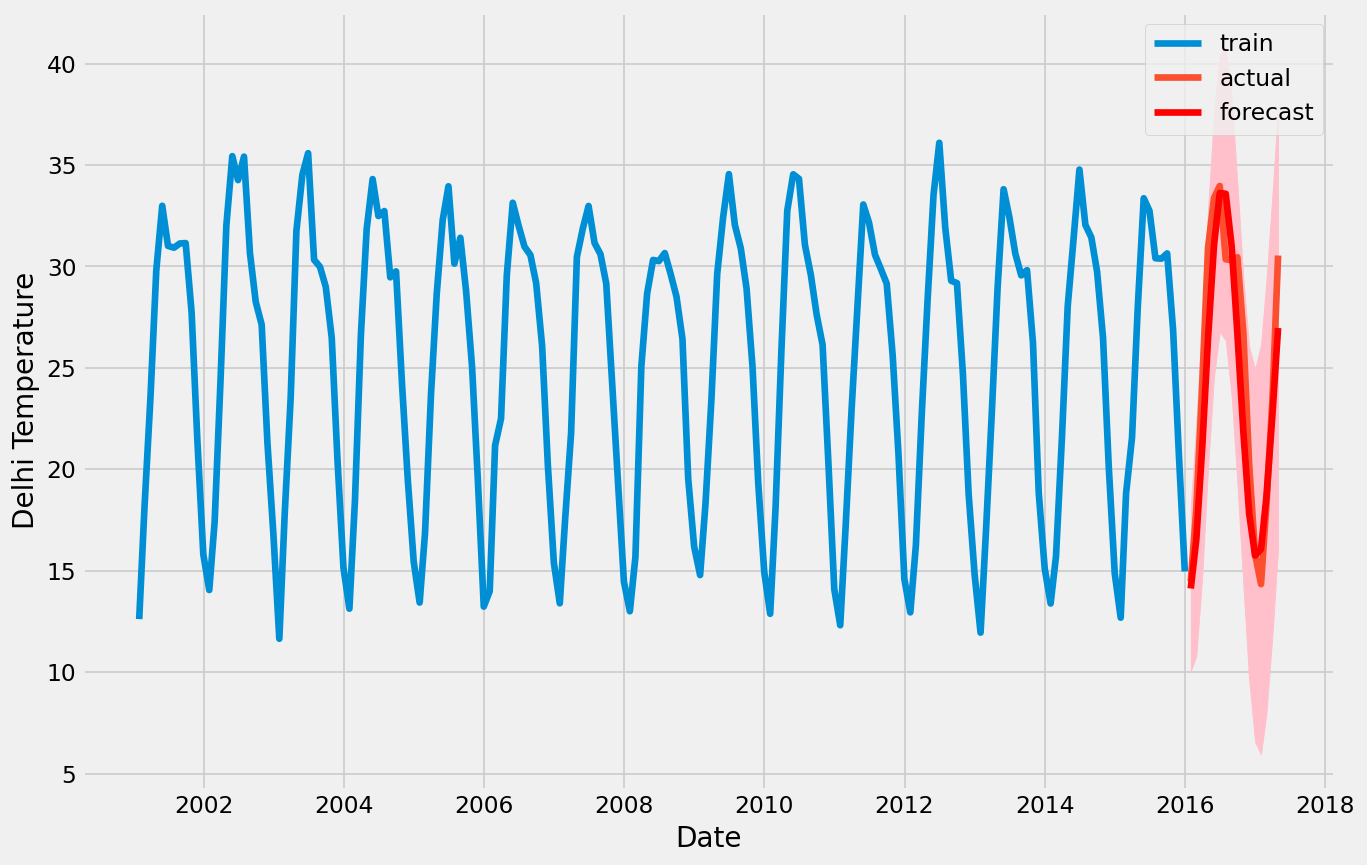

In [ ]:
#forecsat
forecast = model_fit.get_forecast(steps=len(ftestdata))
predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]
plt.figure(figsize=(12,8))

plt.plot(ftraindata.index, ftraindata, label='train')
plt.plot(ftestdata.index,ftestdata,label='actual')

plt.plot(predictedmean.index, predictedmean, color='r', label='forecast')

plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='pink')

plt.xlabel('Date')
plt.ylabel('Delhi Temperature')
plt.legend()
plt.show()

Forcast is similar to previous Model Lets try SARIMA model

# SARIMA

In [ ]:
#lets try withvthe estimated values
model = SARIMAX(ftraindata,order=(0,0,1),seasonal_order=(0,1,1,12),trend='n')
results = model.fit()
# Check the value of Prob(Q) if it is > 0.05 => The residuals are uncorrelated
# Similarly if Prob(JB) > 0.05 => The residuals are normally distributed
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             _tempm   No. Observations:                  180
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -278.353
Date:                            Thu, 15 Dec 2022   AIC                            562.706
Time:                                    15:11:43   BIC                            572.078
Sample:                                01-31-2001   HQIC                           566.510
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2785      0.063      4.400      0.000       0.154       0.403
ma.S.L12      -0.8880      0.101     -8.833      0.000      -1.085      -0.691
sigma2         1.4426      0.183      7.889      0.000       1.084       1.801
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.92   Prob(JB):                         0.57
Heteroskedasticity (H):               0.53   Skew:                             0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Mean Absolute Error for training data
print(np.mean(np.abs(results.resid)))

2.6528032584127907


~3 *C monthly average temperature error

In [ ]:
#calculate RSE and RMSE values
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

start=len(ftraindata)
end=len(ftraindata)+len(ftestdata)-1
predictions = model_fit.predict(start=start, end=end).rename('	SARIMAX(0,0,1)x(0,1,1,12))'	)
rmse_SARIMA = rmse(ftestdata, predictions)
print('Root Mean Squared Error ',rmse_SARIMA)

mse_SARIMA = mean_squared_error(ftestdata, predictions)
print('Mean Squared Error ',mse_SARIMA)

Root Mean Squared Error  2.605019206369591
Mean Squared Error  6.7861250655544545


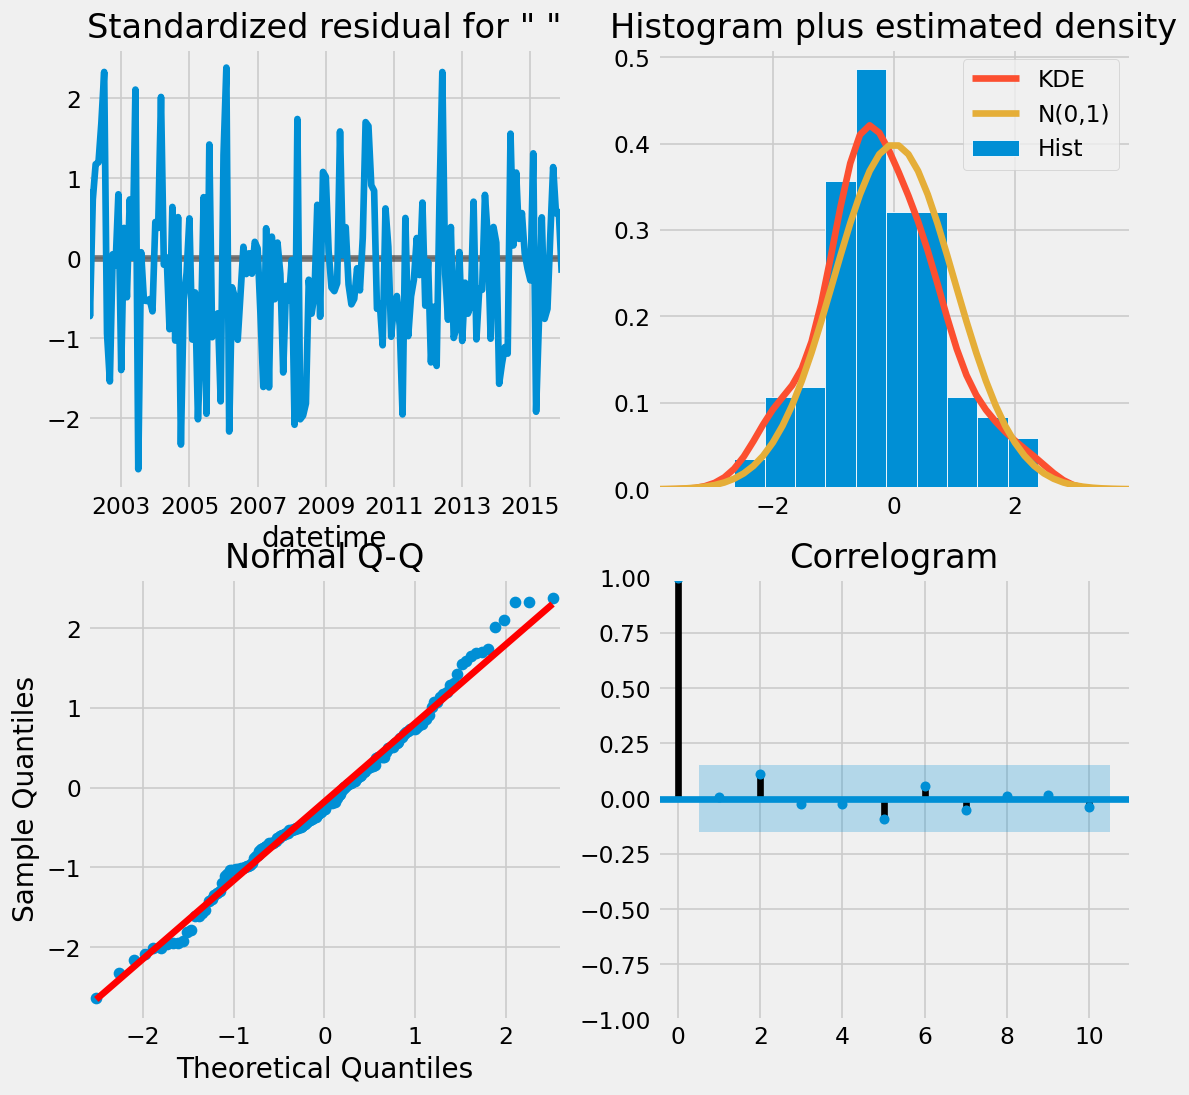

In [ ]:
diagnostics = results.plot_diagnostics(figsize=(10,10))

Here we can see:
Standardized residual plot: No obvious structure 
Histogram & KDE: KDE is normally distributed 
Normal Q-Q: Almost all the points are on the red line 
Correlogram of residuals: is nearly zero for all lags 

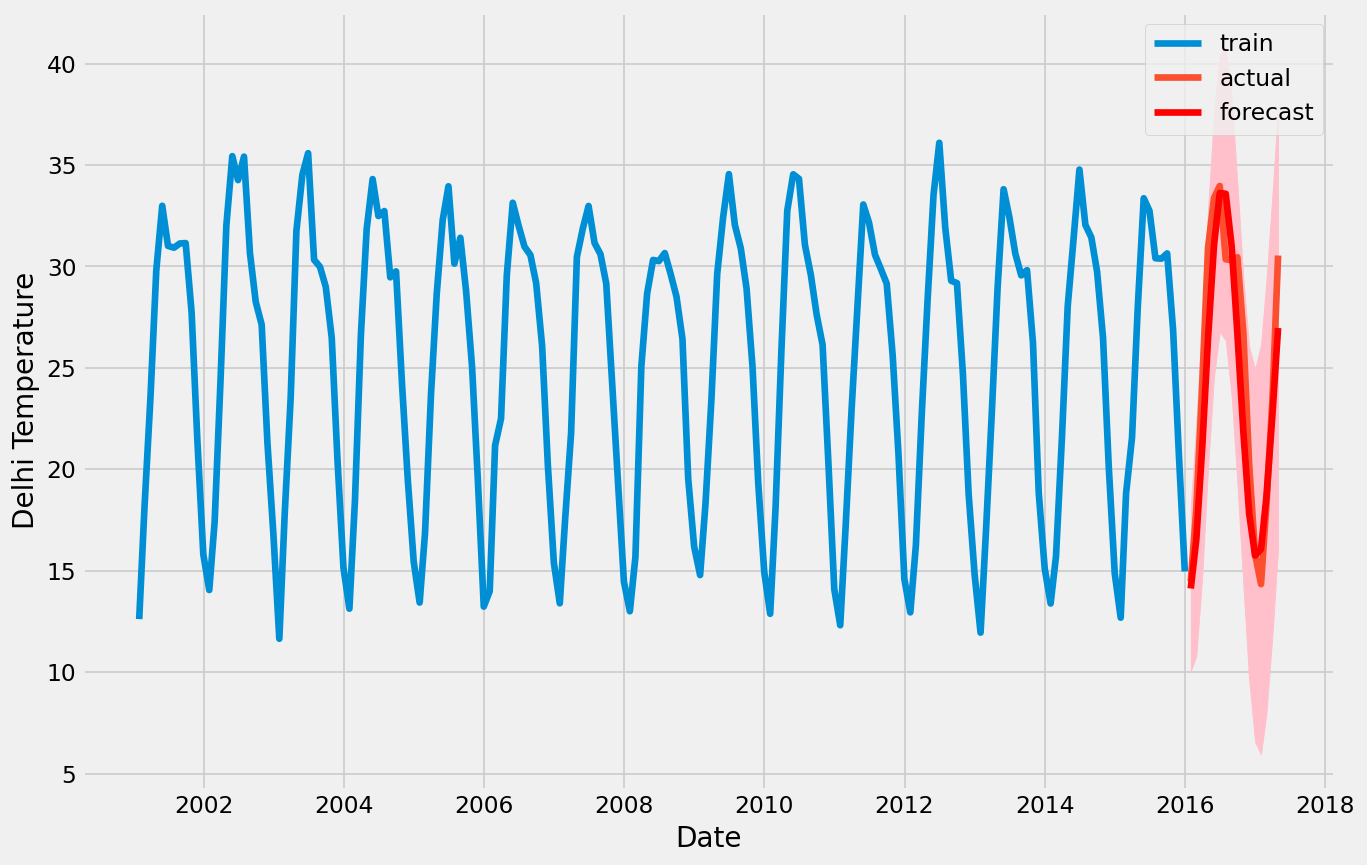

In [ ]:
#forecast 
forecast = model_fit.get_forecast(steps=len(ftestdata))
predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]
plt.figure(figsize=(12,8))

plt.plot(ftraindata.index, ftraindata, label='train')
plt.plot(ftestdata.index,ftestdata,label='actual')

plt.plot(predictedmean.index, predictedmean, color='r', label='forecast')

plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='pink')

plt.xlabel('Date')
plt.ylabel('Delhi Temperature')
plt.legend()
plt.show()

# Auto SARIMA

In [ ]:
#apply auto arima test with sesonality
from pmdarima.arima import auto_arima
auto_arima(ftraindata,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  180
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -314.076
Date:                              Thu, 15 Dec 2022   AIC                            638.153
Time:                                      15:12:35   BIC                            654.117
Sample:                                  01-31-2001   HQIC                           644.626
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0170      0.019      0.887      0.375      -0.021       0.055
ar.L1          0.3753      0.063      5.996      0.000       0.253       0.498
ar.S.L12       0.9989      0.001    778.510      0.000       0.996       1.001
ma.S.L12      -0.8138      0.092     -8.831      0.000      -0.994      -0.633
sigma2         1.4871      0.180      8.271      0.000       1.135       1.840
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.60   Prob(JB):                         0.92
Heteroskedasticity (H):               0.57   Skew:                             0.07
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#lets try with the auto estimated values
model = SARIMAX(ftraindata,order=(1, 0, 0),seasonal_order=(1, 0, [1], 12),trend='n')
results = model.fit()
# Check the value of Prob(Q) if it is > 0.05 => The residuals are uncorrelated
# Similarly if Prob(JB) > 0.05 => The residuals are normally distributed
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               _tempm   No. Observations:                  180
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -327.829
Date:                              Thu, 15 Dec 2022   AIC                            663.657
Time:                                      15:12:36   BIC                            676.429
Sample:                                  01-31-2001   HQIC                           668.836
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4518      0.048      9.417      0.000       0.358       0.546
ar.S.L12       0.9999      0.000   9120.130      0.000       1.000       1.000
ma.S.L12      -0.8514      0.075    -11.284      0.000      -0.999      -0.704
sigma2         1.4917      0.126     11.883      0.000       1.246       1.738
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.44   Prob(JB):                         0.91
Heteroskedasticity (H):               0.57   Skew:                            -0.08
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Mean Absolute Error for training data
print(np.mean(np.abs(results.resid)))

1.8761402077672475


In [ ]:
#calculate RSE and RMSE values
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

start=len(ftraindata)
end=len(ftraindata)+len(ftestdata)-1
predictions = model_fit.predict(start=start, end=end).rename('	SARIMAX(1, 0, 0)x(1, 0, [1], 12)'	)
rmse_SARIMA = rmse(ftestdata, predictions)
print('Root Mean Squared Error ',rmse_SARIMA)

mse_SARIMA = mean_squared_error(ftestdata, predictions)
print('Mean Squared Error ',mse_SARIMA)

Root Mean Squared Error  2.605019206369591
Mean Squared Error  6.7861250655544545


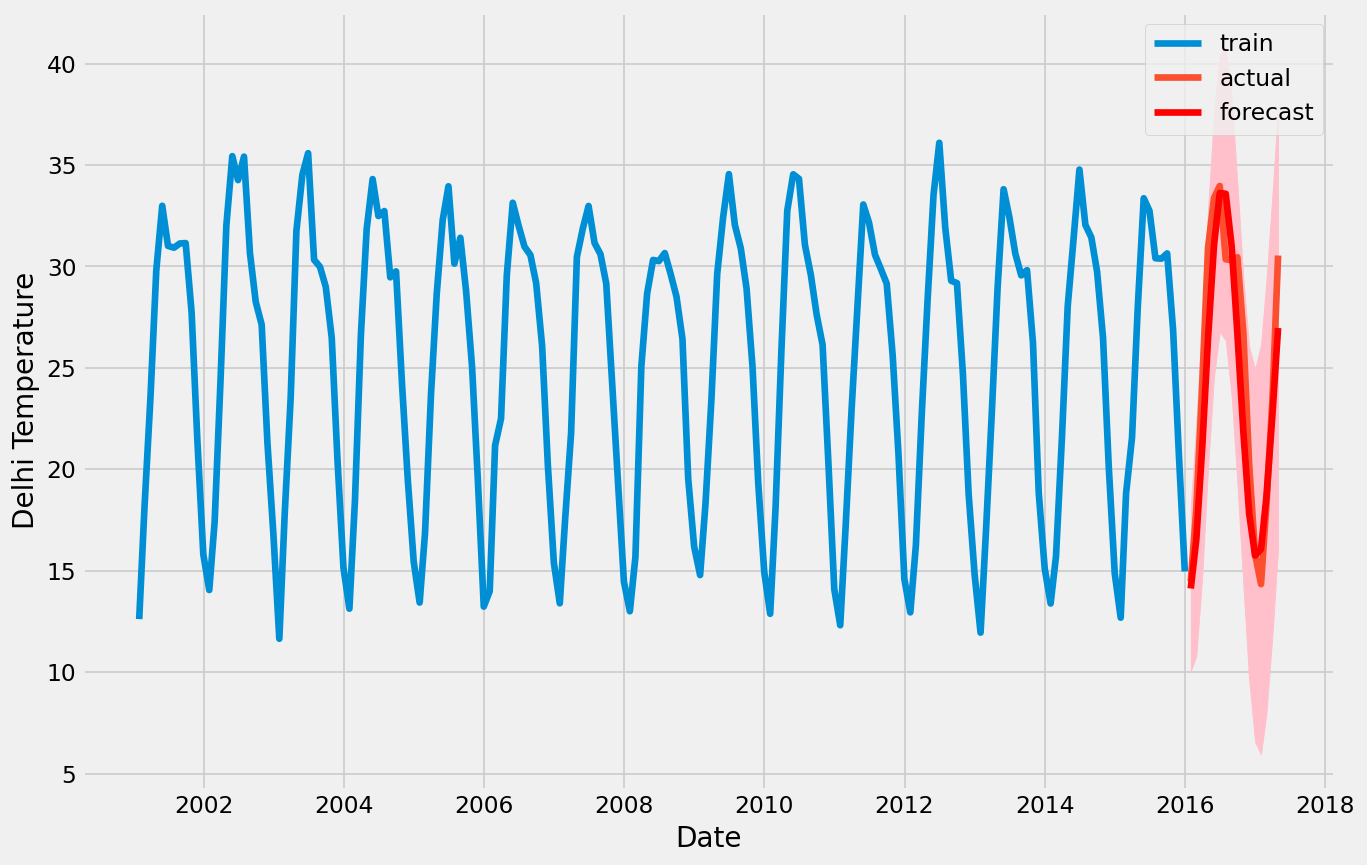

In [ ]:
#forecast
forecast = model_fit.get_forecast(steps=len(ftestdata))
predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]
plt.figure(figsize=(12,8))

plt.plot(ftraindata.index, ftraindata, label='train')
plt.plot(ftestdata.index,ftestdata,label='actual')

plt.plot(predictedmean.index, predictedmean, color='r', label='forecast')

plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='pink')

plt.xlabel('Date')
plt.ylabel('Delhi Temperature')
plt.legend()
plt.show()

# Conclusion

In this time series forcasting we have performed following tasks: \
* data import \
* EDA
* Decomposition \
* check for stationarity and seasonality \
* split data in test and train \
* apply prediction models \
* we have applied 4 prediction models which are \
* SARIMAX(0,0,1)x(0,1,1,12)) \
* ARIMA (2,0,2)
* SARIMAX(4,0,2)
* SARIMAX(1, 0, 0)x(1, 0, [1], 12) \



From application of model and analysis it seems that model SARIMAX(0,0,1)x(0,1,1,12)) and ARIMA (2,0,2) gave significantly better prediction among all models with lesses AIC value and RMSE

Our model clearly captured temperature seasonality.
As we forecast further out into the future, it is natural for us to become less confident in our values.